# Task 2: Customer Segmentation 

**Description:**
 * Dataset (Recommended): Mall Customer (Kaggle)
 * Cluster customers into segments based on income and spending score
 * Perform scaling and visual exploration of groupings
 * Apply K-Means clustering and determine optimal number of clusters
 * Visualize clusters using 2D plots
 
 **Tools & Libraries:**
 1. Python
 2. Pandas
 3. Matplotlib
 4. Scikit-learn
 
 **Covered Topics:**
 * Clustering |  Unsupervised learning
   
 **Bonus:**
 * Try different clustering algorithms (e.g., DBSCAN)
 * Analyze average spending per cluster

In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
# Define output directory
output_dir = './outputs'
os.makedirs(output_dir, exist_ok=True)


# 1. Import libraries
**pandas:** For data loading and manipulation (dataframes).

**numpy:** Numerical operations (arrays, calculations).

**matplotlib / seaborn:** For data visualization.

**StandardScaler:** To scale data (mean=0, std=1), important for clustering.

**KMeans, DBSCAN:** Clustering algorithms from scikit-learn.

**silhouette_score:** To measure how well clusters are formed (higher = better clustering).



In [3]:
# 2. Load dataset
file_path = '/kaggle/input/mall-customers-segmentation/Mall_Customers.csv'
df = pd.read_csv(file_path)

# 2. Load dataset
* Reads the dataset CSV file into a pandas dataframe df.

* The dataframe now contains columns like CustomerID, Genre, Age, Annual Income, Spending Score.



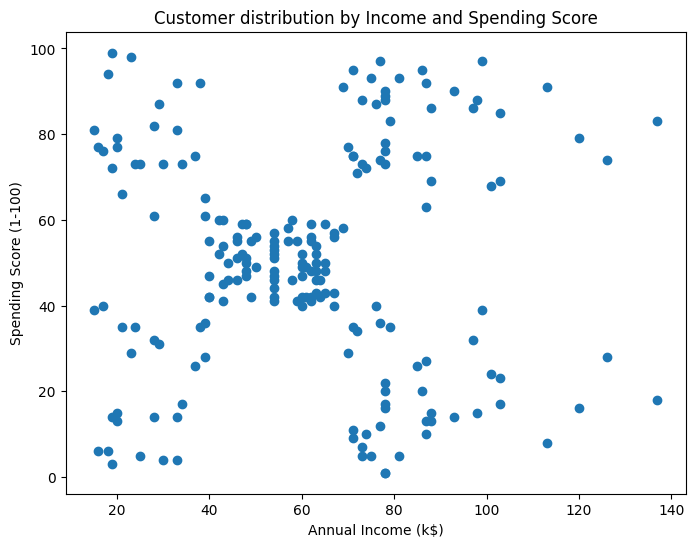

In [4]:
# 5. Select relevant features
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# 4. Visual exploration
plt.figure(figsize=(8,6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer distribution by Income and Spending Score')
plt.savefig(os.path.join(output_dir, 'initial_distribution.png'))
plt.show()

# 3. Select relevant features for clustering
* Selects only the two features relevant for clustering customers:

    **Annual Income (k$):** Customer's income

    **Spending Score (1-100):** Score assigned based on spending behavior

* These are used because clustering is meaningful when dimensions are low and interpretable for business insights.

# 4. Visual exploration
* Plots a scatter plot of customers:

    * **x-axis:** Annual Income

    * **y-axis:** Spending Score

* Helps visually see patterns, potential groupings, or outliers before clustering.



In [5]:
# 5. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Scaling

* StandardScaler transforms data to have:

    **Mean = 0**

    **Standard deviation = 1**

* Scaling is critical for clustering algorithms (KMeans, DBSCAN) because they are distance-based; unscaled data with different units biases the clustering outcome.

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

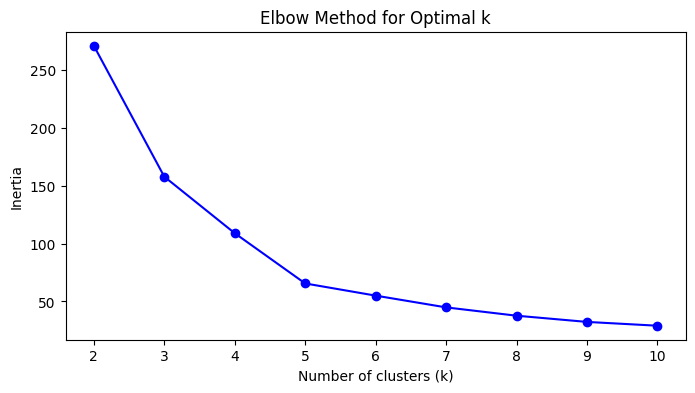

In [6]:
# 6. Determine optimal number of clusters using Elbow method and Silhouette score
inertia = []
silhouette = []
k_range = range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8,4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.savefig(os.path.join(output_dir, 'elbow_method.png'))
plt.show()

# 6. Determine optimal number of clusters using Elbow method and Silhouette score

* **Elbow method (Inertia):**

    * Calculates sum of squared distances within clusters (inertia).

    * Lower inertia is better, but after a certain k, reduction becomes minimal (forming an "elbow").

* **Silhouette Score:**

    * Measures how similar each point is to its cluster vs other clusters.

    * Ranges from -1 to +1: higher means better defined clusters.

🔷 Why loop from k=2 to k=10?
* To check clustering performance for multiple possible k values to find the optimal k.

* **Plot Elbow:**
    * Plots k vs inertia to visually identify where the elbow occurs (optimal k).

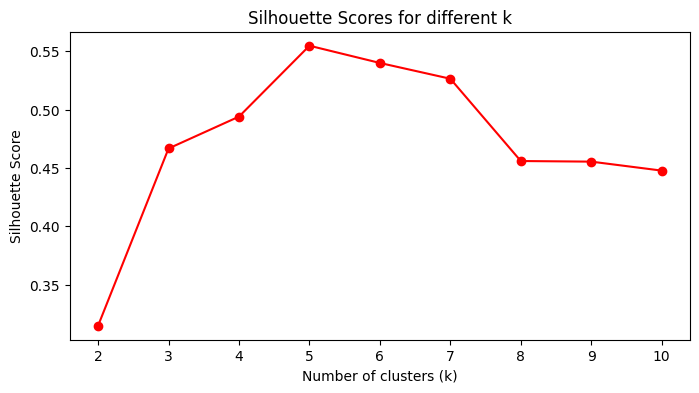

In [7]:
# Plot Silhouette Scores
plt.figure(figsize=(8,4))
plt.plot(k_range, silhouette, 'ro-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for different k')
plt.savefig(os.path.join(output_dir, 'silhouette_scores.png'))
plt.show()

# Plot Silhouette Scores

* Plots k vs silhouette score to choose k with high silhouette score (good clustering quality).


In [8]:
# 7. Apply KMeans with optimal k (assumed k=5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_
df['Cluster'] = labels

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 7. Apply KMeans with optimal k (assumed k=5)

* Sets k=5 (commonly optimal for this dataset).

* Fits KMeans clustering on scaled data.

* labels stores cluster assignments for each customer.

# Add cluster labels to dataframe
* Adds the cluster label as a new column for each customer for further analysis.

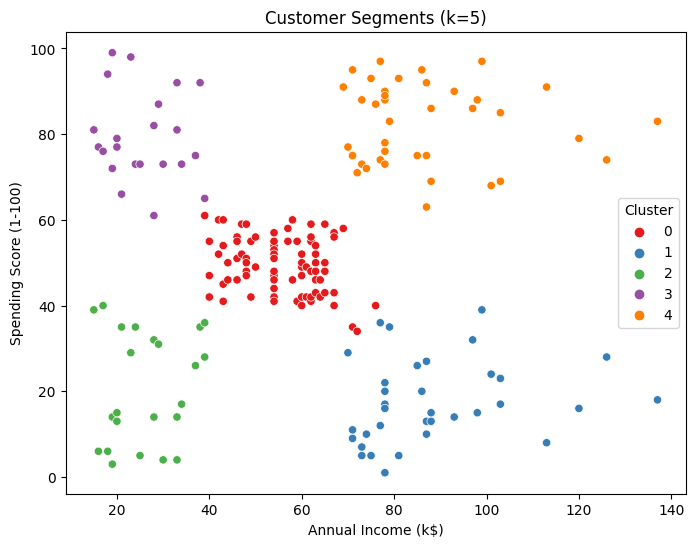

In [9]:
# 8. Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title(f'Customer Segments (k={k_optimal})')
plt.savefig(os.path.join(output_dir, 'kmeans_clusters.png'))
plt.show()


# 8. Visualize clusters
* Plots colored clusters to visually inspect customer segments.

* Each color shows one cluster, enabling marketing or business decisions.


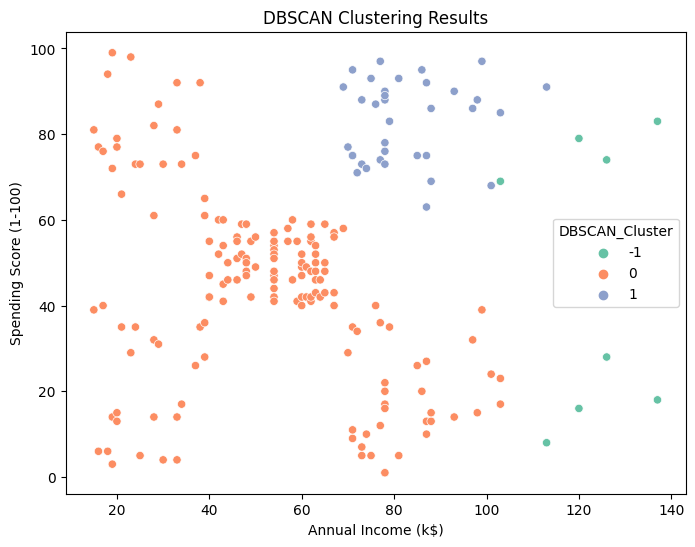

In [10]:
# 9. BONUS: Try DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)
df['DBSCAN_Cluster'] = dbscan_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='Set2')
plt.title('DBSCAN Clustering Results')
plt.savefig(os.path.join(output_dir, 'dbscan_clusters.png'))
plt.show()

# 9. BONUS: Apply DBSCAN

* **DBSCAN (Density-Based Spatial Clustering):**

    * Clusters data based on density of points.

    * Can detect arbitrary shaped clusters and outliers (marked as -1).

* Adds DBSCAN cluster labels to dataframe for comparison with KMeans.

# Visualize DBSCAN clusters
* Visualizes DBSCAN results to see if it finds similar or different groupings compared to KMeans.


In [11]:
# 10. BONUS: Average spending per KMeans cluster
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending Score per KMeans cluster:")
print(avg_spending)

# Save average spending per KMeans cluster to CSV
avg_spending.to_csv(os.path.join(output_dir, 'avg_spending_kmeans.csv'))

Average Spending Score per KMeans cluster:
Cluster
0    49.518519
1    17.114286
2    20.913043
3    79.363636
4    82.128205
Name: Spending Score (1-100), dtype: float64


# 10. BONUS: Analyze average spending per cluster
* Groups data by KMeans cluster and calculates average spending score.

* Useful for business to target:

    * High income & high spending customers for premium offers

    * Low income & low spending customers for basic plans.



In [12]:
# 11 Average spending per DBSCAN cluster (excluding noise)
avg_spending_dbscan = df[df['DBSCAN_Cluster']!=-1].groupby('DBSCAN_Cluster')['Spending Score (1-100)'].mean()
print("\nAverage Spending Score per DBSCAN cluster (excluding noise):")
print(avg_spending_dbscan)

# Save average spending per DBSCAN cluster to CSV
avg_spending_dbscan.to_csv(os.path.join(output_dir, 'avg_spending_dbscan.csv'))



Average Spending Score per DBSCAN cluster (excluding noise):
DBSCAN_Cluster
0    43.101911
1    82.800000
Name: Spending Score (1-100), dtype: float64


# 11 Average spending per DBSCAN cluster (excluding noise)
* Calculates average spending per DBSCAN cluster, ignoring noise points labeled -1.

In [13]:
# Save final dataframe with clusters
df.to_csv(os.path.join(output_dir, 'mall_customers_with_clusters.csv'), index=False)

print("\nAll graphs and data have been saved in the 'outputs' directory.")


All graphs and data have been saved in the 'outputs' directory.
